In [1]:
!pip install pandas numpy scipy kaleido==0.2.1 matplotlib pyarrow pooch seaborn plotly xarray ipywidgets cfgrib cartopy scikit-learn tensorflow openpyxl

In [4]:
import pandas as pd
import glob
import os
#df = pd.read_csv("aemo_nem_SA/PRICE_AND_DEMAND_201401_SA1.csv", parse_dates=["SETTLEMENTDATE"])
#print(df.head())

file_pattern = "aemo_nem_SA/PRICE_AND_DEMAND_*.csv"

csv_files = glob.glob(file_pattern)
dfs = []

for file in csv_files:
    df = pd.read_csv(file, parse_dates=["SETTLEMENTDATE"])
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df.head())

  REGION      SETTLEMENTDATE  TOTALDEMAND    RRP PERIODTYPE
0    SA1 2014-01-01 00:30:00      1528.27  44.56      TRADE
1    SA1 2014-01-01 01:00:00      1433.97  41.81      TRADE
2    SA1 2014-01-01 01:30:00      1351.01  36.73      TRADE
3    SA1 2014-01-01 02:00:00      1296.55  33.54      TRADE
4    SA1 2014-01-01 02:30:00      1248.80  15.14      TRADE


In [5]:
print(combined_df.tail())
#df2017 = pd.read_excel("caiso_raw_data/productionandcurtailmentsdata-jun1_2017-dec31_2017.xlsx", sheet_name=1, parse_dates=["Date"] )
#print(df2017.head())

       REGION      SETTLEMENTDATE  TOTALDEMAND    RRP PERIODTYPE
135835    SA1 2021-09-30 22:00:00      1432.49  38.57      TRADE
135836    SA1 2021-09-30 22:30:00      1343.26  29.57      TRADE
135837    SA1 2021-09-30 23:00:00      1262.69  13.97      TRADE
135838    SA1 2021-09-30 23:30:00      1230.80  26.20      TRADE
135839    SA1 2021-10-01 00:00:00      1360.13  23.52      TRADE


In [6]:
file_pattern = "aemo_nem_SA/freq_5m_increase/PRICE_AND_DEMAND_*.csv"

csv_files_5m = glob.glob(file_pattern)
dfs_5m = []

for file in csv_files_5m:
    df_5m = pd.read_csv(file, parse_dates=["SETTLEMENTDATE"])
    dfs_5m.append(df_5m)

combined_df_5m = pd.concat(dfs_5m, ignore_index=True)
print(combined_df_5m.head())

  REGION      SETTLEMENTDATE  TOTALDEMAND    RRP PERIODTYPE
0    SA1 2021-10-01 00:05:00      1376.74  17.22      TRADE
1    SA1 2021-10-01 00:10:00      1338.87  16.97      TRADE
2    SA1 2021-10-01 00:15:00      1323.73   8.57      TRADE
3    SA1 2021-10-01 00:20:00      1336.61   8.40      TRADE
4    SA1 2021-10-01 00:25:00      1326.17   8.49      TRADE


In [7]:
print(combined_df_5m.tail())

       REGION      SETTLEMENTDATE  TOTALDEMAND   RRP PERIODTYPE
438331    SA1 2025-11-30 23:40:00      1375.64 -7.01      TRADE
438332    SA1 2025-11-30 23:45:00      1363.28 -7.01      TRADE
438333    SA1 2025-11-30 23:50:00      1367.68 -3.26      TRADE
438334    SA1 2025-11-30 23:55:00      1364.32 -7.01      TRADE
438335    SA1 2025-12-01 00:00:00      1374.91 -7.97      TRADE


In [9]:
combined_df = combined_df.set_index('SETTLEMENTDATE')

In [11]:
combined_df

,REGION,TOTALDEMAND,RRP,PERIODTYPE
SETTLEMENTDATE,,,,
2014-01-01 00:30:00,SA1,1528.27,44.56,TRADE
2014-01-01 01:00:00,SA1,1433.97,41.81,TRADE
2014-01-01 01:30:00,SA1,1351.01,36.73,TRADE
2014-01-01 02:00:00,SA1,1296.55,33.54,TRADE
2014-01-01 02:30:00,SA1,1248.80,15.14,TRADE
...,...,...,...,...
2021-09-30 22:00:00,SA1,1432.49,38.57,TRADE
2021-09-30 22:30:00,SA1,1343.26,29.57,TRADE
2021-09-30 23:00:00,SA1,1262.69,13.97,TRADE


In [12]:
combined_df_demand_rrp = combined_df[["TOTALDEMAND", "RRP"]]

In [13]:
combined_df_demand_rrp

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
2014-01-01 00:30:00,1528.27,44.56
2014-01-01 01:00:00,1433.97,41.81
2014-01-01 01:30:00,1351.01,36.73
2014-01-01 02:00:00,1296.55,33.54
2014-01-01 02:30:00,1248.80,15.14
...,...,...
2021-09-30 22:00:00,1432.49,38.57
2021-09-30 22:30:00,1343.26,29.57
2021-09-30 23:00:00,1262.69,13.97


In [14]:
hourly_avg_df_2014_2021_09 = combined_df_demand_rrp.resample('h').mean()
hourly_avg_df_2014_2021_09

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
2014-01-01 00:00:00,1528.270,44.560
2014-01-01 01:00:00,1392.490,39.270
2014-01-01 02:00:00,1272.675,24.340
2014-01-01 03:00:00,1218.905,20.950
2014-01-01 04:00:00,1212.670,-2.545
...,...,...
2021-09-30 20:00:00,1579.715,51.160
2021-09-30 21:00:00,1485.105,47.015
2021-09-30 22:00:00,1387.875,34.070


In [15]:
combined_df_5m = combined_df_5m.set_index('SETTLEMENTDATE')
combined_df_demand_rrp_5m = combined_df_5m[["TOTALDEMAND", "RRP"]]
combined_df_demand_rrp_5m

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
2021-10-01 00:05:00,1376.74,17.22
2021-10-01 00:10:00,1338.87,16.97
2021-10-01 00:15:00,1323.73,8.57
2021-10-01 00:20:00,1336.61,8.40
2021-10-01 00:25:00,1326.17,8.49
...,...,...
2025-11-30 23:40:00,1375.64,-7.01
2025-11-30 23:45:00,1363.28,-7.01
2025-11-30 23:50:00,1367.68,-3.26


In [16]:
hourly_avg_df_2021_2025 = combined_df_demand_rrp_5m.resample('h').mean()
hourly_avg_df_2021_2025

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
2021-10-01 00:00:00,1329.511818,6.110000
2021-10-01 01:00:00,1264.228333,6.197500
2021-10-01 02:00:00,1162.051667,-0.529167
2021-10-01 03:00:00,1071.386667,-0.593333
2021-10-01 04:00:00,1036.329167,0.625000
...,...,...
2025-11-30 20:00:00,1522.130000,-1.691667
2025-11-30 21:00:00,1463.488333,0.103333
2025-11-30 22:00:00,1383.429167,-4.590833


In [17]:
hourly_df = pd.concat([hourly_avg_df_2014_2021_09, hourly_avg_df_2021_2025], ignore_index=False)
hourly_df

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
2014-01-01 00:00:00,1528.270000,44.560000
2014-01-01 01:00:00,1392.490000,39.270000
2014-01-01 02:00:00,1272.675000,24.340000
2014-01-01 03:00:00,1218.905000,20.950000
2014-01-01 04:00:00,1212.670000,-2.545000
...,...,...
2025-11-30 20:00:00,1522.130000,-1.691667
2025-11-30 21:00:00,1463.488333,0.103333
2025-11-30 22:00:00,1383.429167,-4.590833


In [18]:
hourly_df2 = hourly_df.round(2)
hourly_df2

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
2014-01-01 00:00:00,1528.27,44.56
2014-01-01 01:00:00,1392.49,39.27
2014-01-01 02:00:00,1272.68,24.34
2014-01-01 03:00:00,1218.91,20.95
2014-01-01 04:00:00,1212.67,-2.54
...,...,...
2025-11-30 20:00:00,1522.13,-1.69
2025-11-30 21:00:00,1463.49,0.10
2025-11-30 22:00:00,1383.43,-4.59


In [21]:
def calculate_hour_of_year(df, datetime_col_name):
    # Ensure the column is a datetime object
    df.index = pd.to_datetime(df.index)

    # Extract the date of the beginning of the year for each row
    # astype('M8[Y]') truncates the date to the beginning of the year
    #df['Year_Start'] = df[datetime_col_name].astype('M8[Y]')
    #df['Year_Start'] = df[datetime_col_name].dt.year
    # Create the 'Year_Start' column, making sure it is also a datetime object
    df['Year_Start'] = pd.to_datetime(df.index.year, format='%Y')

    # Calculate the time difference (timedelta) from the start of the year
    time_delta = df.index - df['Year_Start']

    # Convert the timedelta to total hours and add 1 to get a 1-based index (1 to 8760)
    # The .dt accessor is used to access the time properties of the Timedelta series
    df['hour_index'] = time_delta.dt.total_seconds() // 3600 + 1
    
    # Clean up the temporary column
    df = df.drop(columns=['Year_Start'])
    
    # Convert to integer type
    df['hour_index'] = df['hour_index'].astype(int)

    return df

In [22]:
hourly_df3 = calculate_hour_of_year(hourly_df2, 'SETTLEMENTDATE')
hourly_df3

,TOTALDEMAND,RRP,hour_index
SETTLEMENTDATE,,,
2014-01-01 00:00:00,1528.27,44.56,1
2014-01-01 01:00:00,1392.49,39.27,2
2014-01-01 02:00:00,1272.68,24.34,3
2014-01-01 03:00:00,1218.91,20.95,4
2014-01-01 04:00:00,1212.67,-2.54,5
...,...,...,...
2025-11-30 20:00:00,1522.13,-1.69,8013
2025-11-30 21:00:00,1463.49,0.10,8014
2025-11-30 22:00:00,1383.43,-4.59,8015


In [23]:
rows_with_nans = hourly_df3[hourly_df3["hour_index"].isna()]
rows_with_nans

,TOTALDEMAND,RRP,hour_index
SETTLEMENTDATE,,,


In [25]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np; np.random.seed(1)

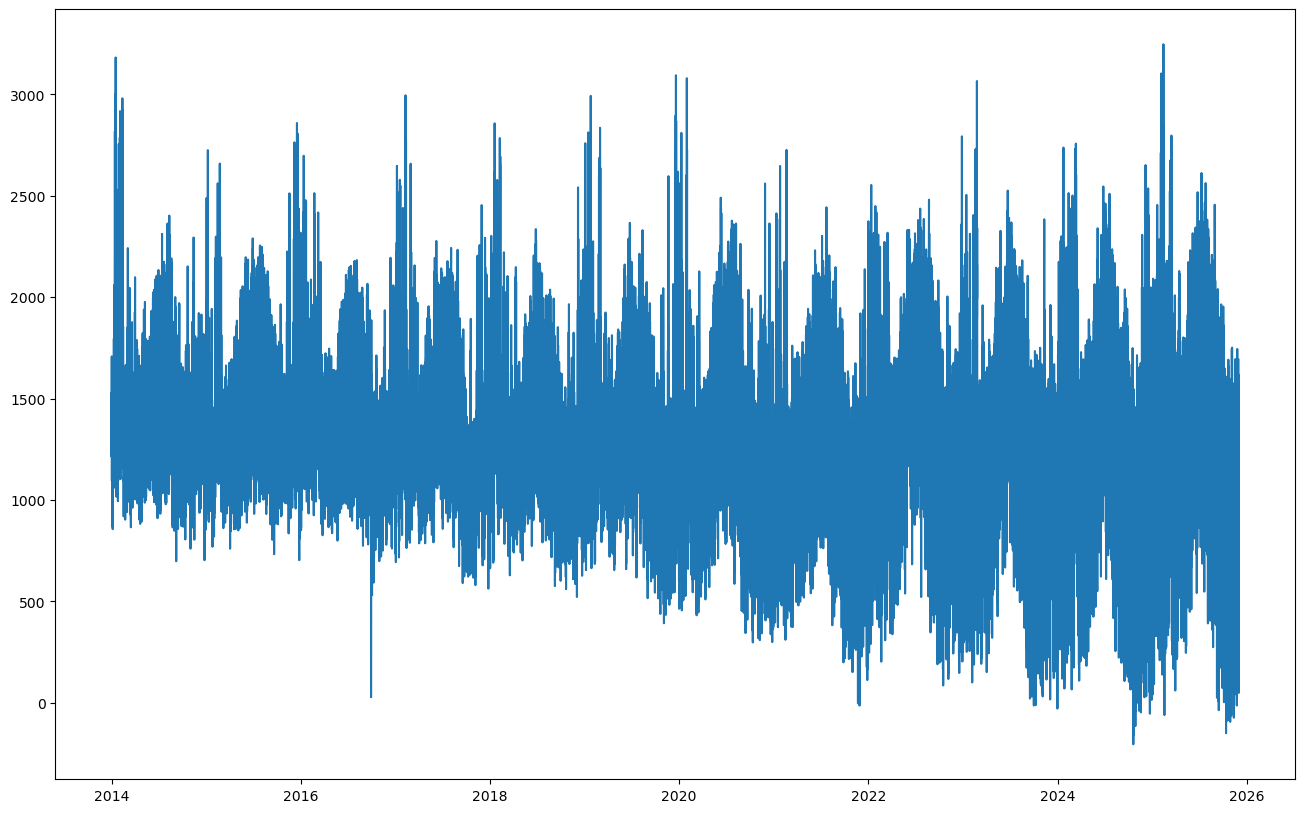

In [27]:
plt.figure(figsize = (16, 10))
plt.plot(hourly_df3.index, hourly_df3['TOTALDEMAND'])

In [32]:
#hourly_df4["hour_index"] = hourly_df4["hour_index"].astype(int)

In [33]:
hourly_df3.dtypes

TOTALDEMAND    float64
RRP            float64
hour_index       int64
dtype: object

In [35]:
summary_df = hourly_df3.groupby(hourly_df3.index.year)['TOTALDEMAND'].agg(['sum', 'median', 'max', 'min'])
summary_df['sum'] = summary_df['sum']/1000000
summary_df

,sum,median,max,min
SETTLEMENTDATE,,,,
2014,12.292841,1361.330,3182.54,698.09
2015,12.250726,1353.515,2859.40,703.27
2016,11.792794,1310.470,2697.82,27.84
2017,11.580612,1274.740,2995.86,562.84
2018,11.359542,1255.955,2857.49,521.75
2019,11.431783,1265.005,3094.86,392.17
2020,11.013940,1234.640,3080.22,297.66
2021,10.536134,1210.830,2726.64,-13.86
2022,11.650945,1354.500,2793.62,85.19


In [36]:
hourly_df3.to_parquet('./aemo_nem_sa_14_25.parquet', compression=None)

In [38]:
hourly_df3.to_csv('./aemo_nem_sa_14_25.csv', compression=None)